In [1]:
import random
import numpy as np

import scipy.stats as st
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.integrate as integrate
%precision 12
from __future__ import division

%matplotlib inline
plt.style.use('ggplot')

In [2]:
def sigmoid(a):
    return 1/(1+np.exp(-a))
    

In [21]:
# initial x(2d vector) and target pair in 10*10 box

def initial_values(N): # N x 4 matrix
    return np.array([(1, np.random.uniform(0,10), np.random.uniform(0,10),np.random.binomial(1, 0.5) ) for i in range(N)])

def weight(): 
    return np.array([np.random.uniform(-1,1), np.random.uniform(-1,1), np.random.uniform(-1,1)])


In [22]:
def linreg(x):
    return -w[0]/w[2]-x*w[1]/w[2]

In [23]:
N = 100
w = weight()
I = initial_values(N)
x = I[:,:3]
t = I[:,3]

for i in range(N):
    if x[:,2][i]>-0.5*x[:,1][i] + 6:
        t[i]=1
    else:
        t[i]=0


a= np.zeros(N)
y = np.zeros(N)
e = np.zeros(N)
turns = 1000
wlist =[w]
turn = 1
while turn < turns:
    for i in range(N):
        a[i] = np.dot(w, x[i])
        y[i] = sigmoid(a[i])
        e[i] = t[i] - y[i]

        eta = 0.1/N**(0.4)
        w =  w + eta * e[i] * x[i]
        wlist += [w]
        turn = turn +1

[0, 10, 0, 10]

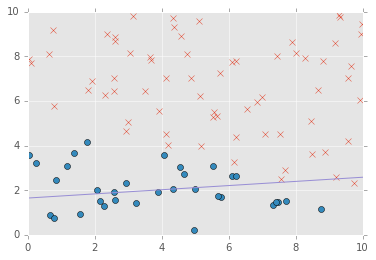

In [24]:
uplist = []
downlist = []
for i in range(N):
    if t[i]==1:
        uplist = uplist +[x[i]]
        
    else:
        downlist = downlist +[x[i]]
uplist = np.array(uplist)
downlist = np.array(downlist)

plt.plot(uplist[:,1], uplist[:,2],'x')
plt.plot(downlist[:,1], downlist[:,2],'o')
X = np.linspace(0.01, 10, 100)
Y = linreg(X)
plt.plot(X,Y)
plt.axis([0,10,0,10])

1.757587368 -0.0751481796205


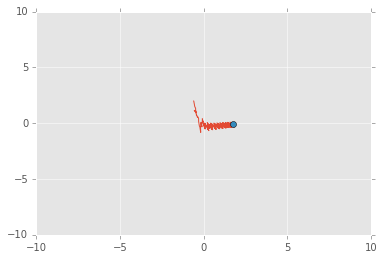

In [7]:
# the graph of y-intrsection vs slope of the linear graph
wlist = np.array(wlist)
plt.plot(-wlist[:,0]/wlist[:,2], wlist[:,1]/wlist[:,2])
plt.plot(-wlist[:,0][-1]/wlist[:,2][-1], wlist[:,1][-1]/wlist[:,2][-1], 'o')
plt.axis([-10,10,-10,10])
print -wlist[:,0][-1]/wlist[:,2][-1], wlist[:,1][-1]/wlist[:,2][-1]

[0, 10, 0, 10]

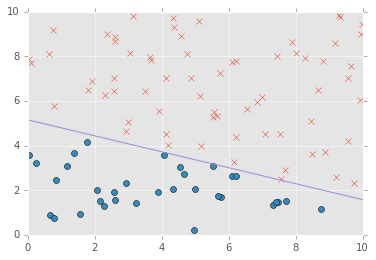

In [25]:
N = 100
w = weight()
I = initial_values(N)

# same t and x 

eta = 0.01
alpha = 0.01
turn = 1
turns = 1000
wlist=[w]
while turn < turns:
    a = np.dot(x, w)
    y = sigmoid(a)
    e = t - y
    g = -np.dot(np.transpose(x), e) # sum , batch 

    w = w - eta * ( g + alpha * w )
    wlist += [w]
    turn += 1
uplist = []
downlist = []
for i in range(N):
    if t[i]==1:
        uplist = uplist +[x[i]]
        
    else:
        downlist = downlist +[x[i]]
uplist = np.array(uplist)
downlist = np.array(downlist)

plt.plot(uplist[:,1], uplist[:,2],'x')
plt.plot(downlist[:,1], downlist[:,2],'o')
X = np.linspace(0.01, 10, 100)
Y = linreg(X)
plt.plot(X,Y)
plt.axis([0,10,0,10])

5.44023664284 0.431642846284


[-10, 10, -10, 10]

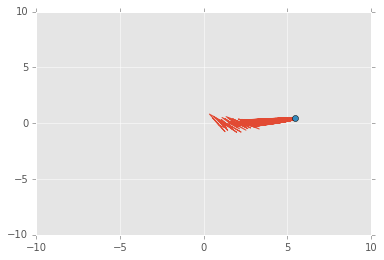

In [9]:
# the graph of y-intrsection vs slope of the linear graph
wlist = np.array(wlist)
plt.plot(-wlist[:,0]/wlist[:,2], wlist[:,1]/wlist[:,2])
plt.plot(-wlist[:,0][-1]/wlist[:,2][-1], wlist[:,1][-1]/wlist[:,2][-1], 'o')
print -wlist[:,0][-1]/wlist[:,2][-1], wlist[:,1][-1]/wlist[:,2][-1]
plt.axis([-10,10,-10,10])

In [10]:
w

array([-14.299753032724,   1.134580442989,   2.62851673034 ])

In [11]:
def initial_values(N): # N x 4 matrix
    return np.array([(1, np.random.uniform(0,5), np.random.uniform(0,10),np.random.binomial(1, 0.5) ) for i in range(N)])

def weight(): 
    return np.array([np.random.uniform(-1,1), np.random.uniform(-1,1), np.random.uniform(-1,1)])

N = 100
w = weight()
I = initial_values(N)
x = I[:,:3]
t = I[:,3]

for i in range(N):
    if x[:,2][i]>-0.5*x[:,1][i] + 6:
        t[i]=1
    else:
        t[i]=0



/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python2.7/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


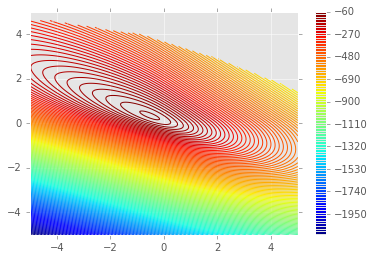

In [12]:
X = x[:,1:]
w1 = np.linspace(-5.0, 5.0, 200)
w2 = np.linspace(-5.0, 5.0, 200)
Z = np.zeros((200,200))

W1, W2 = np.meshgrid(w1, w2)
for i in range(200):
    for j in range(200):
        w = np.array((W1[i,j],W2[i,j]))
        Z[i,j] = np.dot( t, np.log(sigmoid(np.dot(X, w)))) + np.dot((1-t), np.log(1-sigmoid(np.dot(X, w))))
        

plt.contour(W1,W2,Z, 200)
plt.colorbar()


In [26]:
x[:10]

array([[ 1.            ,  5.18325326544 ,  3.981442963173],
       [ 1.            ,  4.545331009219,  3.035727783083],
       [ 1.            ,  4.124486347005,  7.039529123591],
       [ 1.            ,  0.674901608923,  0.874718898288],
       [ 1.            ,  0.791063172685,  5.780114451191],
       [ 1.            ,  1.374110775129,  3.655780106644],
       [ 1.            ,  8.815066884532,  7.775999106079],
       [ 1.            ,  6.830389227043,  5.951994828356],
       [ 1.            ,  4.332095483069,  2.032598599744],
       [ 1.            ,  2.560579543696,  6.424967339791]])

[0, 10, 0, 10]

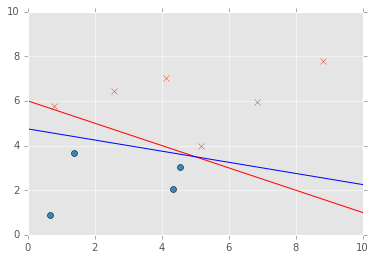

In [36]:

#plt.plot(x[:10][:,1], x[:10][:,2],'o')
X = np.linspace(0.01, 10, 100)
Y = -0.5*X + 6
plt.plot(X,Y,color='r')
N = 10

eta = 0.01
alpha = 0.01
turn = 1
turns = 1000
wlist=[w]
while turn < turns:
    a = np.dot(x[:10], w)
    y = sigmoid(a)
    e = t[:10] - y
    g = -np.dot(np.transpose(x[:10]), e) # sum , batch 

    w = w - eta * ( g + alpha * w )
    wlist += [w]
    turn += 1
uplist = []
downlist = []
for i in range(N):
    if t[i]==1:
        uplist = uplist +[x[:10][i]]
        
    else:
        downlist = downlist +[x[:10][i]]
uplist = np.array(uplist)
downlist = np.array(downlist)

plt.plot(uplist[:,1], uplist[:,2],'x')
plt.plot(downlist[:,1], downlist[:,2],'o')
X = np.linspace(0.01, 10, 100)
Y = linreg(X)
plt.plot(X,Y,color = 'b')
plt.axis([0,10,0,10])

In [37]:
x = x[:10]
t= t[:10]

def M(w, p, alpha):
    return  -np.dot(t, np.log(sigmoid(np.dot(x, w)))) - np.dot((1-t), np.log(1-sigmoid(np.dot(x, w)))) + 0.5*alpha* np.dot(w,w)

def H(w, p, alpha):
    return M(w, p, alpha)+np.dot(p,p)

def gradDescent(w, alpha):
    return alpha*w - np.dot((t-sigmoid(np.dot(x, w))),x)

alpha = 0.01

    
# initial point 
w0 = np.array([-10, 2,3]) 

Listw = [w0]

# number of samples 
N = 40000

eta = 0.01
epsilon = np.sqrt(2*eta)



for i in range(N): 
    p0 = np.random.normal(0,1,3)

    ph = p0 - epsilon* gradDescent(w0, alpha)/2.0
    wn = w0 + epsilon* ph
    pn = ph - epsilon* gradDescent(wn, alpha)/2.0
    

    a = H(wn, pn, alpha)/H(w0, p0, alpha)

    if a >=1:
        Listw = Listw +[wn]
        w0,p0 = wn, pn 
    else:
        if random.random() < a:
            Listw = Listw + [wn]
            w0,p0 = wn, pn
            


Listw = np.array(Listw)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [38]:
len(Listw)

38841

In [53]:
w

array([-21.017902938782,   1.389690773801,   4.027060713918])

[-1, 6, -2, 7]

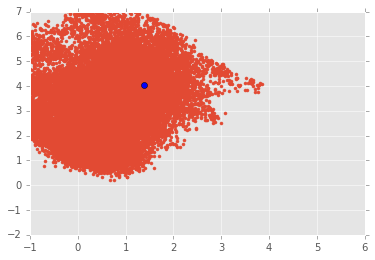

In [54]:
plt.plot(Listw[10000:][:,1], Listw[10000:][:,2], '.')
plt.plot(1.389690773801,   4.027060713918, 'o', color='b')
plt.axis([-1,6,-2,7])

In [40]:
selected_w = np.array([Listw[10000:][1000*i] for i in range(25)])

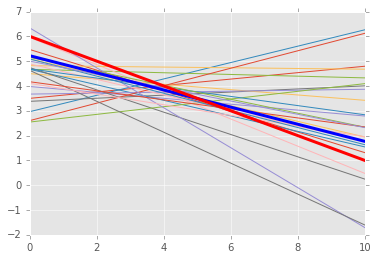

In [57]:
X = np.linspace(0.01, 10, 100)
Y = linreg(X)


for i in range(25):
    plt.plot(X, -(selected_w[:,0][i]+selected_w[:,1][i]*X)/selected_w[:,2][i])
plt.plot(X,Y, linewidth=3, color='b')

X = np.linspace(0.01, 10, 100)


Y = -0.5*X + 6
plt.plot(X,Y,linewidth=3,color='r')


plt.show()

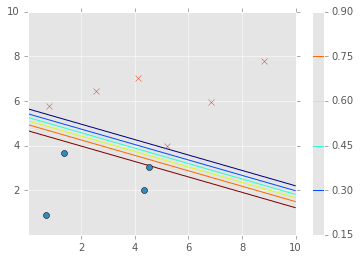

In [58]:
XX, YY = np.meshgrid(X, X)
Z = sigmoid(-w[0]-w[1]*XX-w[2]*YY)
plt.contour(XX, YY, Z)
plt.colorbar()
plt.plot(uplist[:,1], uplist[:,2],'x')
plt.plot(downlist[:,1], downlist[:,2],'o')

In [60]:
XX, YY = np.meshgrid(X, X)

Z = []
for i in range(25):
    w = selected_w[i]
    Z.append(sigmoid(-w[0]-w[1]*XX-w[2]*YY))


In [61]:
Z = np.array(Z)
np.shape(Z)

(25, 100, 100)

In [62]:
np.shape(sum(Z))

(100, 100)

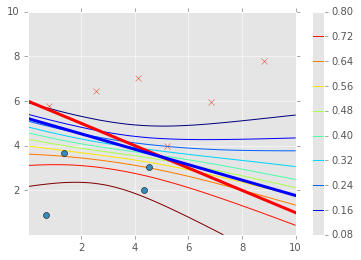

In [68]:
ZZ = sum(Z)/30
plt.contour(XX, YY, ZZ, 10)
X = np.linspace(0.01, 10, 100)
Y = -0.5*X + 6
plt.plot(X,Y,color='r', linewidth=3)
plt.colorbar()
plt.plot(uplist[:,1], uplist[:,2],'x')
plt.plot(downlist[:,1], downlist[:,2],'o')

X = np.linspace(0.01, 10, 100)
Y = linreg(X)
plt.plot(X, Y, linewidth=3, color = 'b')

In [48]:
w

array([-21.017902938782,   1.389690773801,   4.027060713918])